In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

### Problem statement

This notebook demonstrate the end-to-end flow of machine learning classification problem using neural networks from keras library

- Training
- Validation on a holdout set generated from the original training data
- Evaluation on the test data

We'll use Fashion Fashion-MNIST data for this example

### Dataset
Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. 

Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image

**Labels**

Each training and test example is assigned to one of the following labels:

- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot

In [2]:
# Load the dataset from keras
fashion_data = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_data.load_data()

In [3]:
set(train_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

Image Label : 1


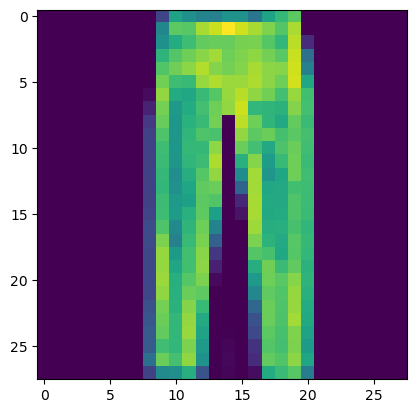

In [4]:
imgIndex = 16
img = train_images[imgIndex]
print("Image Label :",train_labels[imgIndex])
plt.imshow(img)

### Create  neural network
When working with input tensors like image datasets, we need to find a way to properly feed them into our input layer.
After all, your input data shape needs to match your input layer shape.
- Flatten: 
    Fashion MNIST has 70,000 images in 10 different fashion categories. Each image has 28* 28 pixel resolution. Here we have an issue feeding this multi-dimensional array or tensor into our input layer. In order to converts the multi-dimensional arrays into flattened one-dimensional arrays or single-dimensional arrays we can use Flatten function. **keras.layers.flatten** function flattens the multi-dimensional input tensors into a single dimension, so you can structure your input layer and build your neural network model, then pass those data into every single neuron of the model effectively
    
    Why do we have to flatten the input data?<br>
    - The first layer of a neural network model should have the same shape as the input data. This is a general rule of thumb for neural networks
    

In [5]:
model = keras.Sequential([
                    keras.layers.Flatten(input_shape=(28,28)), # first layer with 784 neurons
                    keras.layers.Dense(128, activation=tf.nn.relu), # second fully connected layer with 128 neurons
                    keras.layers.Dense(128, activation=tf.nn.relu), # third fully connected layer with 128 neurons
                    keras.layers.Dense(10, activation=tf.nn.softmax) # output layer with with 10 neurons
])

In [6]:
# compilation is a step that transforms the simple sequence of layers that we previously defined into a highly efficient series of matrix transformations.
model.compile(optimizer = 'adam',
           loss = 'sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [7]:
model.fit(train_images, train_labels, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 2.1610 - accuracy: 0.7477
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6216 - accuracy: 0.7976
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5615 - accuracy: 0.8085
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5004 - accuracy: 0.8239
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4468 - accuracy: 0.8392
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4239 - accuracy: 0.8473
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3994 - accuracy: 0.8565
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3831 - accuracy: 0.8620
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3763 - accuracy: 0.8647
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.369

In [11]:
model.evaluate(test_images, test_labels)
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.4248 - accuracy: 0.8534


In [12]:
print("model accuracy", test_accuracy)

model accuracy 0.8533999919891357


In [14]:
predictions = model.predict(test_images[0:5])

# Print the predicted labels
print(predictions)

1/1 [==============================] - 0s 193ms/step
[[8.7657126e-16 1.3648350e-17 7.1672065e-23 1.8363883e-19 2.3302058e-18
  4.1342764e-03 8.1167372e-16 9.2818253e-02 2.6355408e-05 9.0302110e-01]
 [2.1481599e-05 6.9820965e-07 9.5767462e-01 2.1043017e-05 1.4006721e-02
  5.3463698e-16 2.8268622e-02 3.0843746e-14 6.9045009e-06 9.5525029e-12]
 [1.9496013e-16 1.0000000e+00 2.8156070e-25 1.7333222e-10 5.5383021e-17
  7.5315752e-37 6.5424960e-15 0.0000000e+00 3.9326261e-17 0.0000000e+00]
 [1.0771415e-14 1.0000000e+00 9.0340523e-21 1.7213448e-08 4.3172594e-13
  5.6190730e-28 2.0684195e-13 0.0000000e+00 5.6106769e-13 8.3296264e-32]
 [5.6414869e-02 8.3954437e-05 1.9353190e-01 1.0801229e-02 5.6635022e-02
  6.6333536e-07 6.7412984e-01 3.0984454e-06 8.3991196e-03 2.8378631e-07]]
